# Import Required Libraries
Import the necessary libraries such as pandas, numpy, matplotlib, seaborn, and wordcloud.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set plot style for seaborn
sns.set(style="whitegrid")

# Load Dataset
Load the dataset from a CSV file into a pandas DataFrame.

In [2]:
# Load Dataset
df = pd.read_csv('data/train.csv')

# Display the first few rows of the dataframe to ensure it loaded correctly
df.head()

,resume_text,job_description_text,label
0,SummaryHighly motivated Sales Associate with e...,Net2Source Inc. is an award-winning total work...,No Fit
1,Professional SummaryCurrently working with Cat...,At Salas OBrien we tell our clients that were ...,No Fit
2,SummaryI started my construction career in Jun...,Schweitzer Engineering Laboratories (SEL) Infr...,No Fit
3,SummaryCertified Electrical Foremanwith thirte...,"Mizick Miller & Company, Inc. is looking for a...",No Fit
4,SummaryWith extensive experience in business/r...,Life at Capgemini\r\nCapgemini supports all as...,No Fit


# Data Overview
Display the first few rows of the dataset and get basic information such as shape, columns, and data types.

In [3]:
# Display the shape of the dataframe
df.shape

# Display the columns of the dataframe
df.columns

# Display the data types of each column
df.dtypes

# Display basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6241 entries, 0 to 6240
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   resume_text           6241 non-null   object
 1   job_description_text  6241 non-null   object
 2   label                 6241 non-null   object
dtypes: object(3)
memory usage: 146.4+ KB


# Missing Values Analysis
Check for missing values in the dataset and handle them appropriately.

Missing values in each column:
 resume_text             0
job_description_text    0
label                   0
dtype: int64


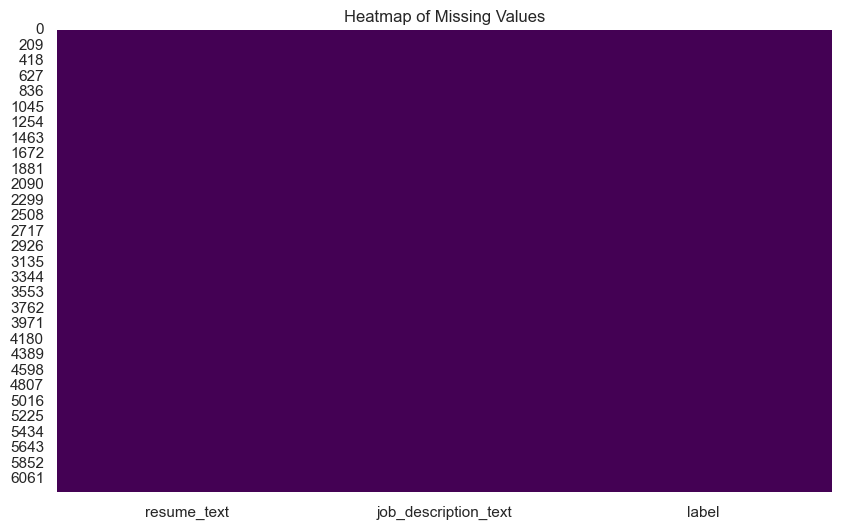

Missing values after handling:
 resume_text             0
job_description_text    0
label                   0
dtype: int64


In [4]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the number of missing values for each column
print("Missing values in each column:\n", missing_values)

# Visualize the missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


# Verify that there are no more missing values
missing_values_after = df.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

# Text Data Preprocessing
Preprocess the text data by removing punctuation, stop words, and performing tokenization.

In [5]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords from NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


# Define a function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply the preprocessing function to the resume_text and job_description_text columns
df['resume_text_processed'] = df['resume_text'].apply(preprocess_text)
df['job_description_text_processed'] = df['job_description_text'].apply(preprocess_text)

# Display the first few rows of the dataframe to ensure preprocessing worked correctly
df[['resume_text_processed', 'job_description_text_processed']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\85596\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\85596\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\85596\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,resume_text_processed,job_description_text_processed
0,"[summaryhighly, motivated, sales, associate, e...","[net2source, inc, awardwinning, total, workfor..."
1,"[professional, summarycurrently, working, cate...","[salas, obrien, tell, clients, engineered, imp..."
2,"[summaryi, started, construction, career, june...","[schweitzer, engineering, laboratories, sel, i..."
3,"[summarycertified, electrical, foremanwith, th...","[mizick, miller, company, inc, looking, dynami..."
4,"[summarywith, extensive, experience, businessr...","[life, capgemini, capgemini, supports, aspects..."


# Exploratory Data Analysis
Perform EDA on the text data.

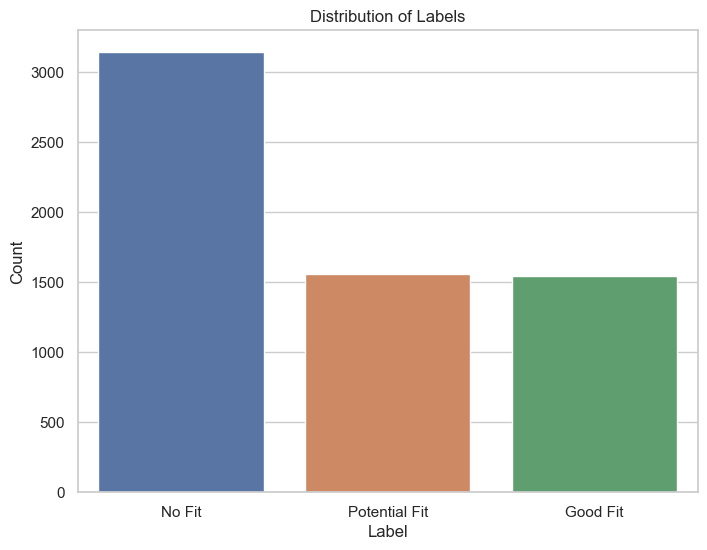

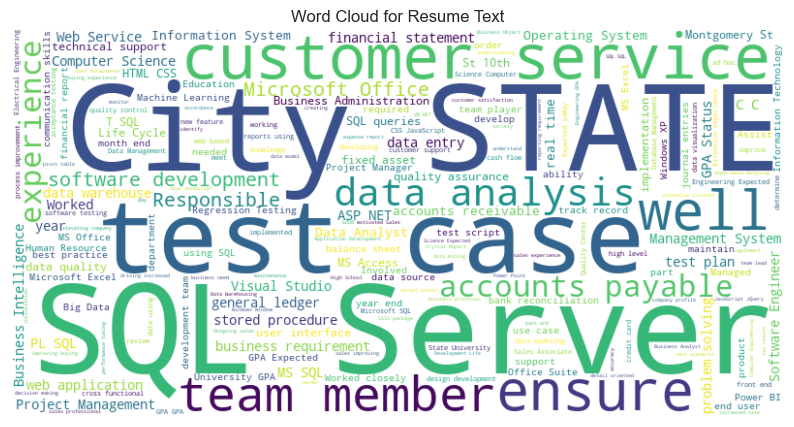

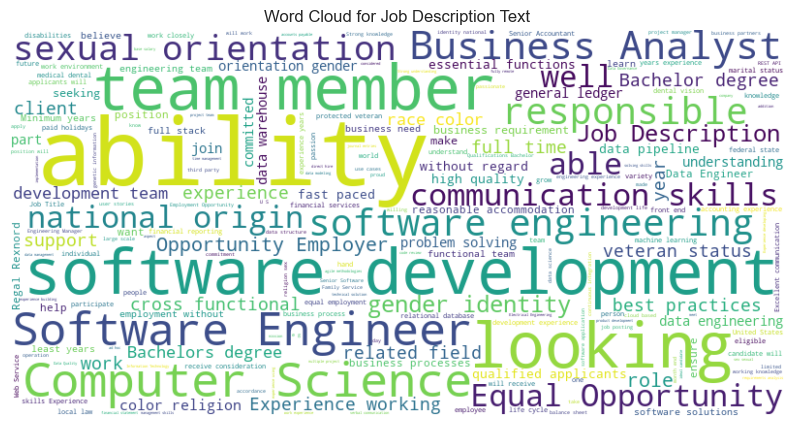

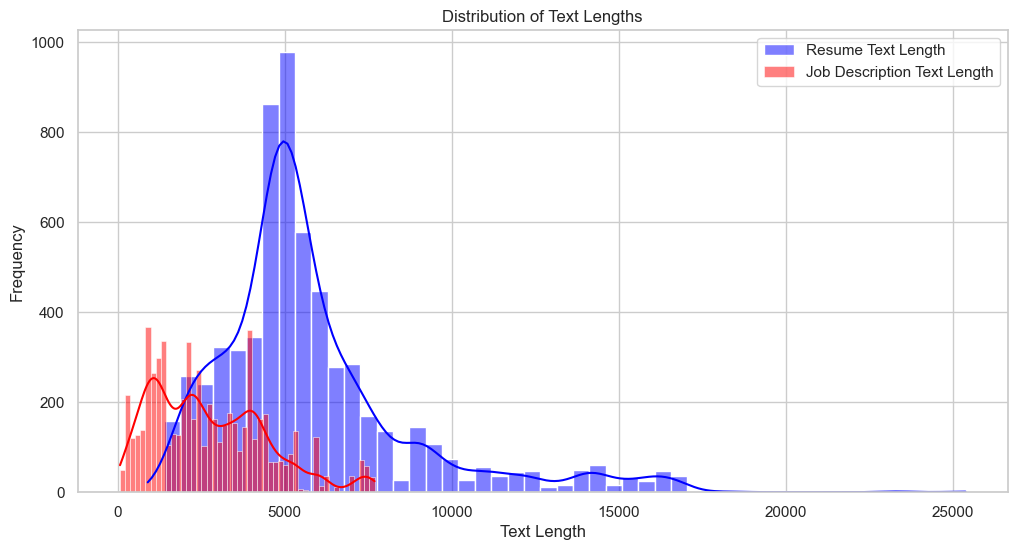

Resume Text Length Statistics:
 count     6241.000000
mean      5812.562089
std       2991.254808
min        901.000000
25%       4242.000000
50%       5139.000000
75%       6612.000000
max      25367.000000
Name: resume_text_length, dtype: float64

Job Description Text Length Statistics:
 count    6241.000000
mean     2738.786092
std      1721.167034
min        72.000000
25%      1233.000000
50%      2388.000000
75%      3955.000000
max      7688.000000
Name: job_description_text_length, dtype: float64


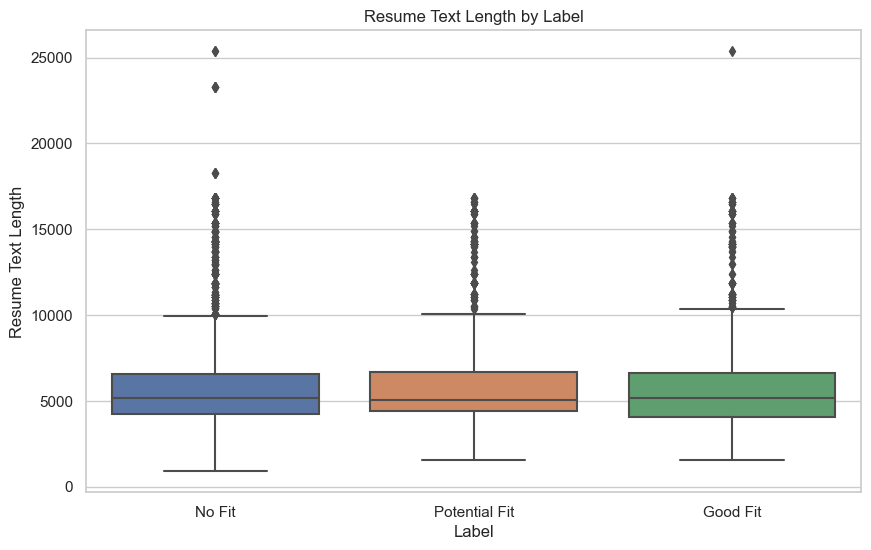

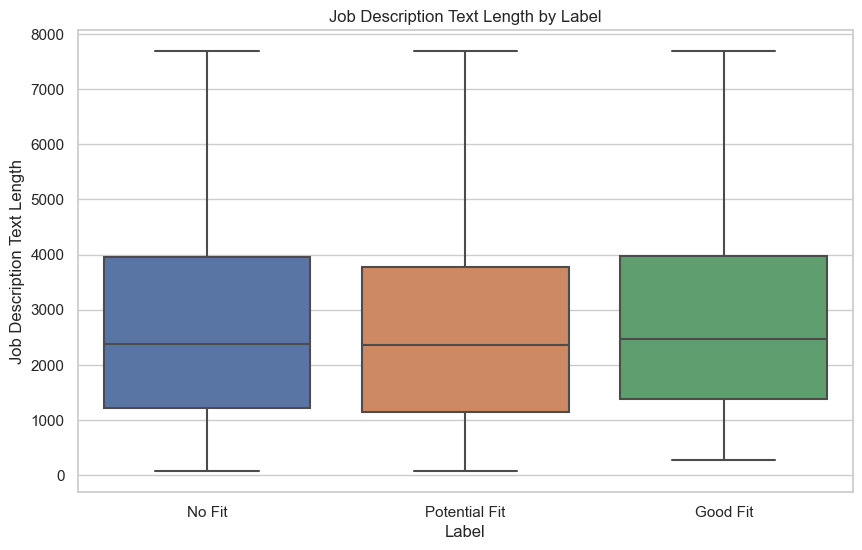

In [6]:
# Exploratory Data Analysis

# Visualize the distribution of the labels
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Generate word clouds for resume_text and job_description_text
resume_text = ' '.join(df['resume_text'])
job_description_text = ' '.join(df['job_description_text'])

# Word cloud for resume_text
plt.figure(figsize=(10, 6))
wordcloud_resume = WordCloud(width=800, height=400, background_color='white').generate(resume_text)
plt.imshow(wordcloud_resume, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Resume Text')
plt.show()

# Word cloud for job_description_text
plt.figure(figsize=(10, 6))
wordcloud_job_description = WordCloud(width=800, height=400, background_color='white').generate(job_description_text)
plt.imshow(wordcloud_job_description, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Description Text')
plt.show()

# Calculate the length of resume_text and job_description_text
df['resume_text_length'] = df['resume_text'].apply(len)
df['job_description_text_length'] = df['job_description_text'].apply(len)

# Visualize the distribution of text lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['resume_text_length'], bins=50, kde=True, color='blue', label='Resume Text Length')
sns.histplot(df['job_description_text_length'], bins=50, kde=True, color='red', label='Job Description Text Length')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display basic statistics for text lengths
resume_text_stats = df['resume_text_length'].describe()
job_description_text_stats = df['job_description_text_length'].describe()

print("Resume Text Length Statistics:\n", resume_text_stats)
print("\nJob Description Text Length Statistics:\n", job_description_text_stats)

# Visualize the correlation between text lengths and labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='resume_text_length', data=df)
plt.title('Resume Text Length by Label')
plt.xlabel('Label')
plt.ylabel('Resume Text Length')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='job_description_text_length', data=df)
plt.title('Job Description Text Length by Label')
plt.xlabel('Label')
plt.ylabel('Job Description Text Length')
plt.show()

# Word Cloud Visualization
Generate word clouds for resume text and job description text to visualize the most common words.

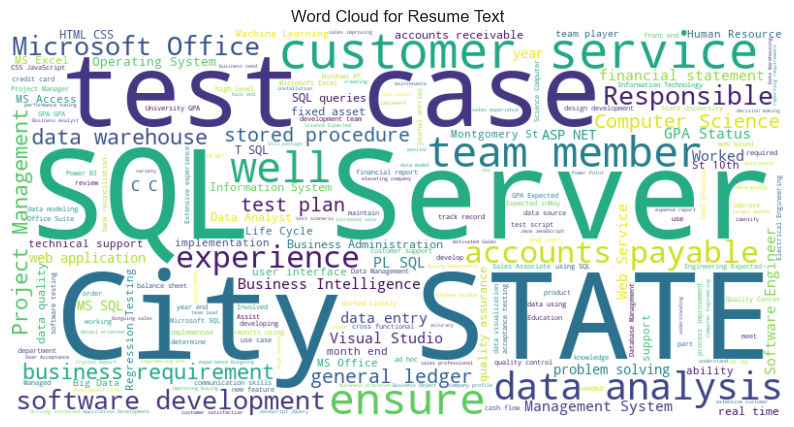

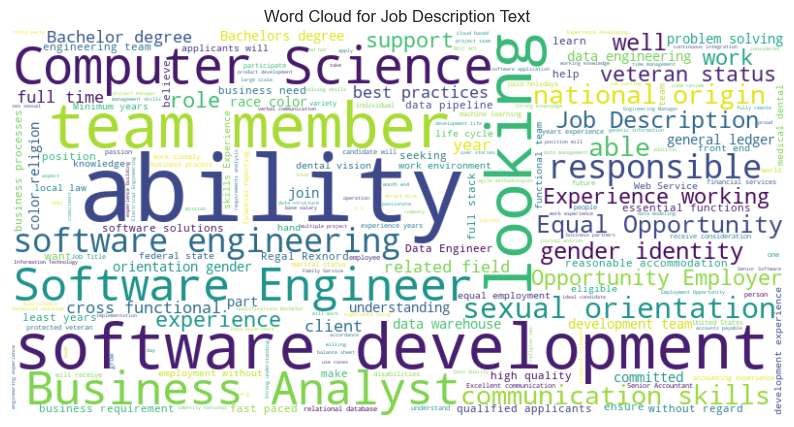

In [7]:
# Generate word clouds for resume_text and job_description_text
resume_text = ' '.join(df['resume_text'])
job_description_text = ' '.join(df['job_description_text'])

# Word cloud for resume_text
plt.figure(figsize=(10, 6))
wordcloud_resume = WordCloud(width=800, height=400, background_color='white').generate(resume_text)
plt.imshow(wordcloud_resume, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Resume Text')
plt.show()

# Word cloud for job_description_text
plt.figure(figsize=(10, 6))
wordcloud_job_description = WordCloud(width=800, height=400, background_color='white').generate(job_description_text)
plt.imshow(wordcloud_job_description, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Description Text')
plt.show()

# Common Words Analysis
Analyze the most common words in resume text and job description text.

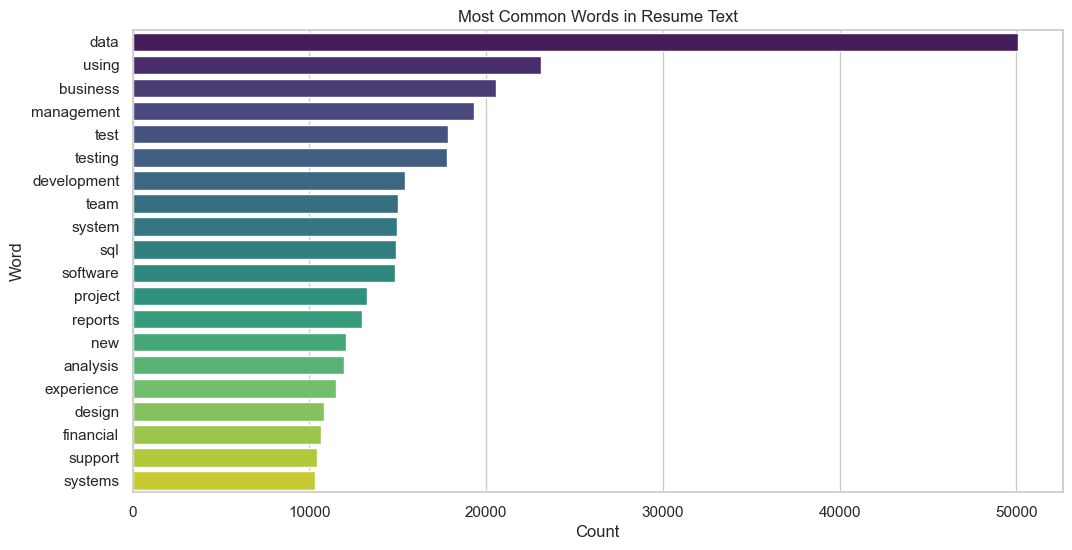

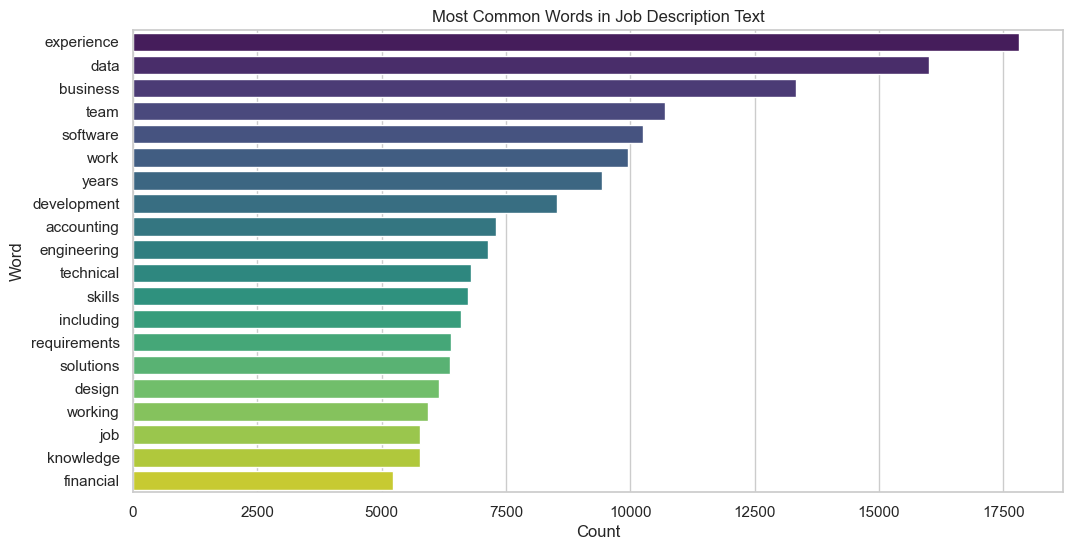

In [8]:
import collections

# Flatten the list of tokens for resume_text_processed and job_description_text_processed
resume_tokens = [token for sublist in df['resume_text_processed'] for token in sublist]
job_description_tokens = [token for sublist in df['job_description_text_processed'] for token in sublist]

# Count the frequency of each word in resume_tokens and job_description_tokens
resume_word_counts = collections.Counter(resume_tokens)
job_description_word_counts = collections.Counter(job_description_tokens)

# Get the 20 most common words in resume_tokens and job_description_tokens
common_resume_words = resume_word_counts.most_common(20)
common_job_description_words = job_description_word_counts.most_common(20)

# Convert the common words to a DataFrame for better visualization
common_resume_words_df = pd.DataFrame(common_resume_words, columns=['Word', 'Count'])
common_job_description_words_df = pd.DataFrame(common_job_description_words, columns=['Word', 'Count'])

# Plot the most common words in resume_text
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=common_resume_words_df, palette='viridis')
plt.title('Most Common Words in Resume Text')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# Plot the most common words in job_description_text
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=common_job_description_words_df, palette='viridis')
plt.title('Most Common Words in Job Description Text')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# N-grams Analysis
Perform n-grams analysis to find common phrases in the text data.

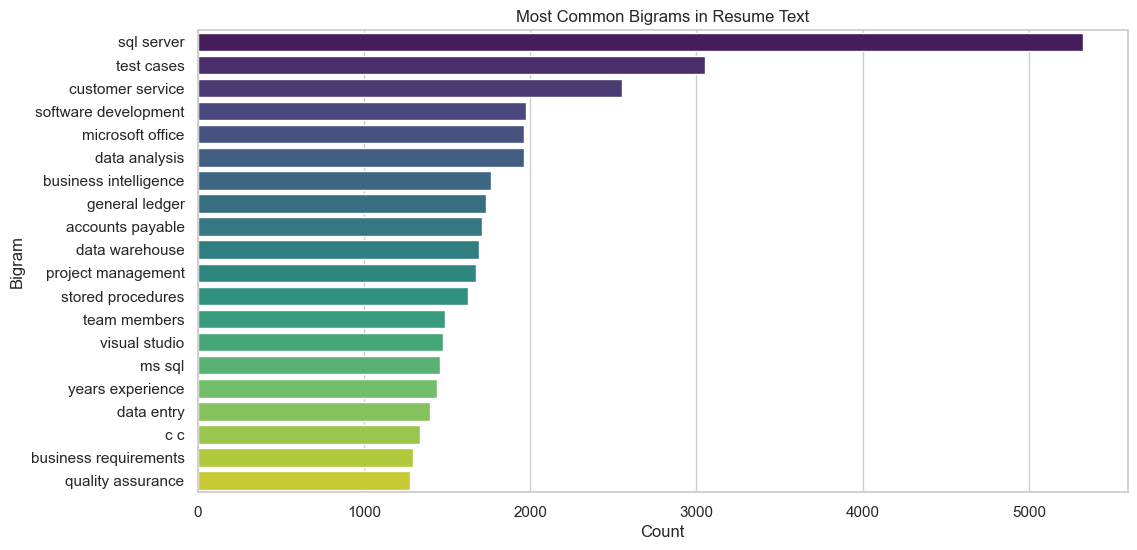

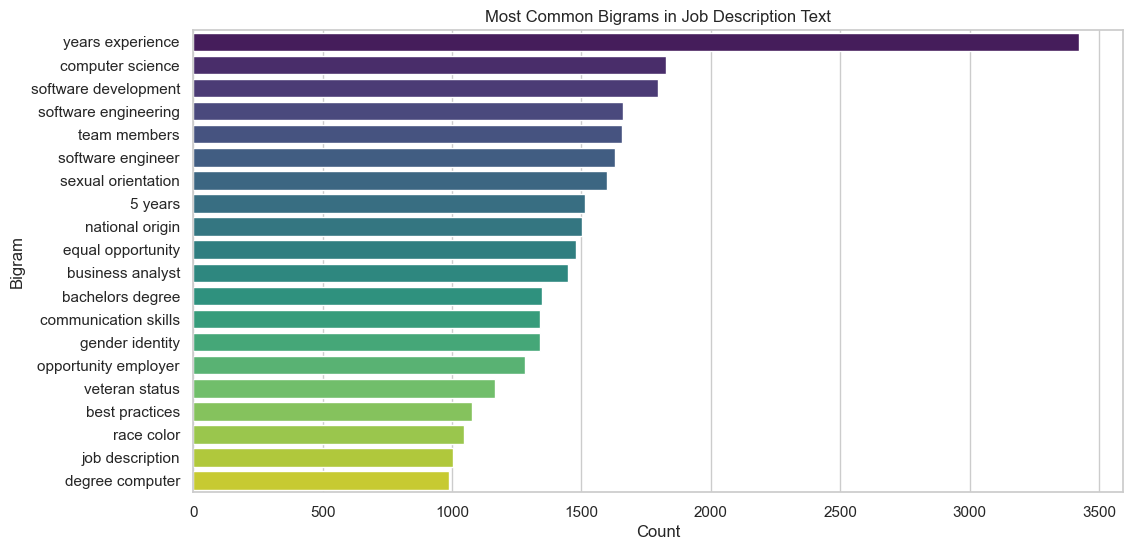

In [9]:
import itertools
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Define a function to generate n-grams
def generate_ngrams(text, n):
    n_grams = zip(*[text[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in n_grams]

# Apply the n-gram function to the processed text columns
df['resume_bigrams'] = df['resume_text_processed'].apply(lambda x: generate_ngrams(x, 2))
df['job_description_bigrams'] = df['job_description_text_processed'].apply(lambda x: generate_ngrams(x, 2))

# Flatten the list of bigrams for resume and job description
resume_bigrams = list(itertools.chain(*df['resume_bigrams']))
job_description_bigrams = list(itertools.chain(*df['job_description_bigrams']))

# Count the frequency of each bigram
resume_bigram_counts = Counter(resume_bigrams)
job_description_bigram_counts = Counter(job_description_bigrams)

# Get the 20 most common bigrams
common_resume_bigrams = resume_bigram_counts.most_common(20)
common_job_description_bigrams = job_description_bigram_counts.most_common(20)

# Convert the common bigrams to a DataFrame for better visualization
common_resume_bigrams_df = pd.DataFrame(common_resume_bigrams, columns=['Bigram', 'Count'])
common_job_description_bigrams_df = pd.DataFrame(common_job_description_bigrams, columns=['Bigram', 'Count'])

# Plot the most common bigrams in resume_text
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Bigram', data=common_resume_bigrams_df, palette='viridis')
plt.title('Most Common Bigrams in Resume Text')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

# Plot the most common bigrams in job_description_text
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Bigram', data=common_job_description_bigrams_df, palette='viridis')
plt.title('Most Common Bigrams in Job Description Text')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

# Label Distribution Analysis
Analyze the distribution of labels in the dataset.

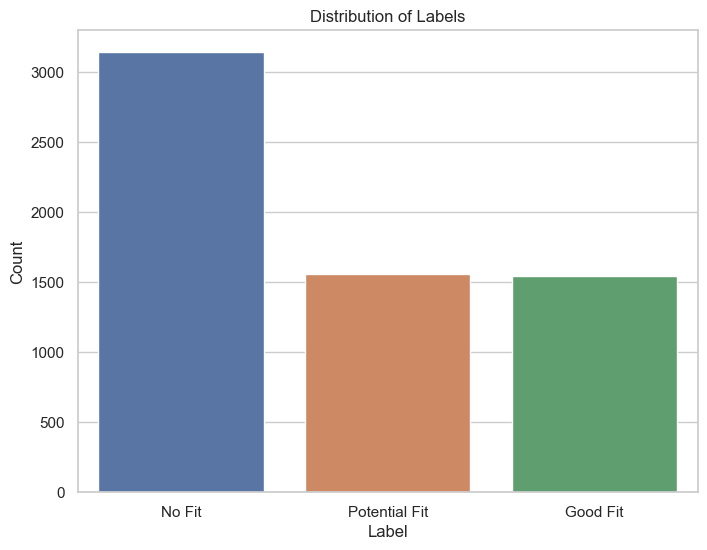

Label Counts:
 No Fit           3143
Potential Fit    1556
Good Fit         1542
Name: label, dtype: int64

Label Percentages:
 No Fit           50.360519
Potential Fit    24.931902
Good Fit         24.707579
Name: label, dtype: float64


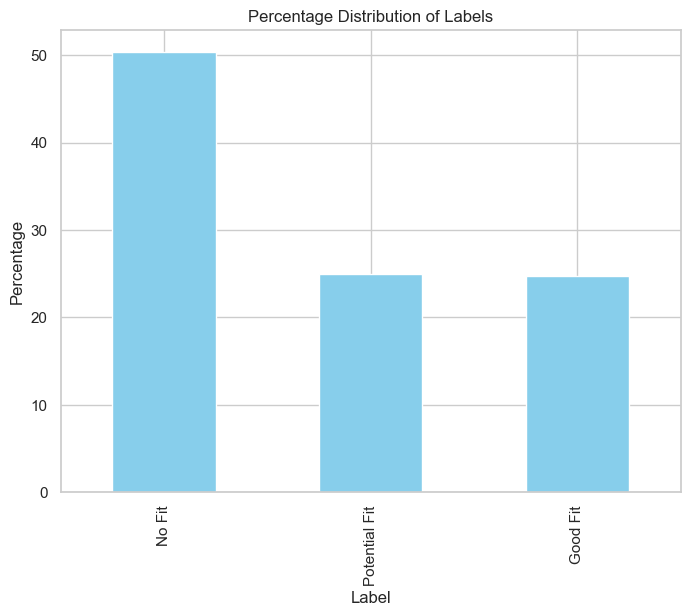

In [10]:
# Label Distribution Analysis

# Visualize the distribution of the labels
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Display the count of each label
label_counts = df['label'].value_counts()
print("Label Counts:\n", label_counts)

# Display the percentage of each label
label_percentages = df['label'].value_counts(normalize=True) * 100
print("\nLabel Percentages:\n", label_percentages)

# Plot the percentage distribution of labels
plt.figure(figsize=(8, 6))
label_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Percentage')
plt.show()

## Feature Engineering (Extract Skill)

Apply the NER dynamically with the pretrained keyword using Dask for large datasets.

In [12]:
import pandas as pd
import spacy
import re

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Predefined list of common skills (for keyword matching)
SKILL_KEYWORDS =[
    # Soft Skills
    "communication", "teamwork", "leadership", "adaptability", "conflict resolution",
    "negotiation", "emotional intelligence", "time management", "problem-solving",
    "critical thinking", "organization", "creativity", "decision-making", "stress management",
    "customer service", "client relations", "empathy", "active listening", "patience",
    "collaboration", "interpersonal skills", "mentoring", "delegation", "coaching",
    "presentation skills", "public speaking", "self-motivation", "positive attitude",
    "work ethic", "attention to detail", "multitasking", "confidentiality", "responsibility",
    "conflict management", "team building", "negotiation skills", "adaptability", "decision making",

    # Hard Skills
    "programming", "python", "java", "c++", "data analysis", "machine learning", "deep learning",
    "natural language processing", "cloud computing", "aws", "azure", "gcp", "sql", "excel", "tensorflow",
    "pytorch", "project management", "financial management", "marketing strategies", "accounting",
    "budgeting", "inventory management", "customer relationship management", "sap", "oracle", "content management systems",
    "microsoft office", "adobe creative suite", "graphic design", "ui/ux design", "video editing", "3d modeling", "animation",
    "medical billing", "legal research", "technical writing", "engineering design", "cad", "solidworks", "scientific research methods",
    "business analysis", "data visualization", "statistics", "market research", "product management",
    "business intelligence", "seo", "html", "css", "javascript", "ruby", "php", "angular", "node.js", "react", "vue.js",
    "database management", "git", "gitHub", "docker", "kubernetes", "machine learning algorithms", "ai development", "blockchain",
    "ethical hacking", "penetration testing", "web development", "mobile app development", "cybersecurity", "it support",
    "data engineering", "data science", "software testing", "quality assurance", "automation testing", "ux research", "cloud architecture",
    "technical documentation", "project scheduling", "cost management", "risk management", "agile", "scrum", "devops",
    "system administration", "network management", "hardware troubleshooting", "it infrastructure", "digital marketing", "social media management",
    "virtualization", "amazon s3", "docker", "python scripting", "data mining", "robotic process automation", "ar/vr development",

    # Healthcare Skills
    "medical billing", "medical coding", "patient care", "clinical research", "medical terminology", "patient management",
    "medical records", "surgical assistance", "healthcare compliance", "electronic health records (EHR)",
    "HIPAA compliance", "nursing", "pharmacy management", "medical insurance", "diagnostic procedures", "laboratory management",

    # Design & Creative Skills
    "graphic design", "web design", "ux/ui design", "motion graphics", "illustration", "photo editing", "video production",
    "branding", "user research", "animation", "3d modeling", "visual storytelling", "interface design", "product design",
    "prototyping", "photography", "creative writing", "content creation", "adobe photoshop", "adobe illustrator",
    "adobe premiere", "autocad", "sketch", "figma", "cinema 4d", "blender", "invision", "after effects",

    # Business & Management Skills
    "business analysis", "market research", "business development", "strategic planning", "product management",
    "change management", "supply chain management", "negotiation", "sales management", "business intelligence",
    "customer relationship management", "financial analysis", "cost analysis", "financial modeling", "budgeting",
    "forecasting", "p&l management", "project management", "agile", "scrum", "lean management", "resource planning",
    "time management", "corporate governance", "human resources", "performance management", "sales operations",
    "contract management", "inventory management", "vendor management", "customer success", "sales strategy",

    # IT & Technology Skills
    "software development", "cloud computing", "cybersecurity", "network management", "database administration",
    "data engineering", "it support", "it infrastructure", "cloud architecture", "devops", "docker", "kubernetes",
    "machine learning", "artificial intelligence", "blockchain", "database management", "python", "java", "c++", "html",
    "css", "javascript", "react", "angular", "node.js", "sql", "data analysis", "sql server", "r", "pandas", "jupyter",
    "hadoop", "tableau", "data visualization", "api development", "data modeling", "cloud services", "google cloud",
    "aws", "azure", "linux", "bash scripting", "network security", "penetration testing", "ethical hacking",
    "virtualization", "agile methodologies", "scrum", "project management tools", "jira", "git", "gitlab"
]


# Compile a regex pattern for dynamic matching of skill-like phrases
SKILL_PATTERN = re.compile(r'\b(?:' + '|'.join(map(re.escape, SKILL_KEYWORDS)) + r')\b', re.IGNORECASE)

# Function to extract skills dynamically
def extract_dynamic_skills(resume_text):
    doc = nlp(resume_text)  # Process the resume text with spaCy
    skills = set()  # Use a set to avoid duplicates

    # Extract skills using named entity recognition
    for ent in doc.ents:
        if ent.label_ in ['ORG', 'MISC', 'PRODUCT', 'SKILL']:
            skills.add(ent.text.strip())
    
    # Extract skills using the keyword list
    keyword_matches = set(re.findall(SKILL_PATTERN, resume_text))
    skills.update(keyword_matches)  # Combine NER and keyword matches

    return list(skills)  # Convert back to a list for DataFrame storage

# Load your DataFrame

# Ensure the 'resume_text_processed' column contains strings
df['resume_text_processed'] = df['resume_text_processed'].apply(
    lambda x: ' '.join(x) if isinstance(x, list) else x
)

# Apply skill extraction to the 'Cleaned_Resume_str' column
df['extracted_skills'] = df['resume_text_processed'].apply(extract_dynamic_skills)

# Save the DataFrame with extracted skills to a CSV file
output_path = 'output_with_dynamic_skills.csv'
df.to_csv(output_path, index=False)

# Display a preview of the resultss
print(f"Processed results saved to {output_path}")
print(df[['resume_text_processed', 'extracted_skills']].head())


Processed results saved to output_with_dynamic_skills.csv
                               resume_text_processed  \
0  summaryhighly motivated sales associate extens...   
1  professional summarycurrently working caterpil...   
2  summaryi started construction career june 2017...   
3  summarycertified electrical foremanwith thirte...   
4  summarywith extensive experience businessrequi...   

                                    extracted_skills  
0  [avantis microsoft office, customer service, p...  
1  [project management, teamwork, 120x, caterpill...  
2  [customer service, organization, leadership, j...  
3  [multitasking, nec, united states department l...  
4  [columbia, project management, excel, quality ...  
